In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

'%.4f'

# Psedorandom number generators (PRNG)

While psuedorandom numbers are generated by a deterministic algorithm, we can mostly treat them as if they were true random numbers and we will drop the “pseudo” prefix. Fundamentally, the algorithm generates **random integers** which are then **normalized** to give a floating point number from the **standard uniform distribution**. 

Random numbers from other distributions are in turn generated using these uniform random deviates, see later.

Some definitions:
1. A random variate is a particular outcome of a random variable.
2. A random deviate or simply deviate is the difference of random variate with respect to the distribution central location (e.g., mean), often divided by the standard deviation of the distribution.

Random variates are used when simulating processes driven by random influences (stochastic processes). In modern applications, such simulations would **derive random variates corresponding to any given probability distribution from computer procedures designed to create random variates corresponding to a uniform distribution**, where these procedures would actually provide values chosen from a uniform distribution of pseudorandom numbers.

Procedures to generate random variates corresponding to a given distribution are known as procedures for (uniform) random number generation or non-uniform pseudo-random variate generation.

The distinction between random variable and random variate is subtle and is not always made in the literature. It is useful when one wants to distinguish between a random variable itself with an associated probability distribution on the one hand, and random draws from that probability distribution on the other, in particular when those draws are ultimately derived by floating-point arithmetic from a pseudo-random sequence.

Check these sources:
- [Random variate - Wikipedia](https://en.wikipedia.org/wiki/Random_variate)
- [Random number generation - Wikipedia](https://en.wikipedia.org/wiki/Random_number_generation)
- [Pseudo-random number sampling - Wikipedia](https://en.wikipedia.org/wiki/Pseudo-random_number_sampling)
- [How to generate random variables from scratch (no library used) | by Tirthajyoti Sarkar | Towards Data Science](https://towardsdatascience.com/how-to-generate-random-variables-from-scratch-no-library-used-4b71eb3c8dc7)
- book

## Linear congruential generators (LCG)

[LCG](https://en.wikipedia.org/wiki/Linear_congruential_generator) is among the simplest and most popular pseudo random number generators. It relies on the recursive and fully deterministic relation:

$$
z_{i+1}=(a z_i+c)\mod{m}
$$

Hull-Dobell Theorem: The LCG will have a period $m$ for all seeds if and only if

* $c$ and $m$ are relatively prime,
* $a−1$ is divisible by all prime factors of $m$
* $a−1$ is a multiple of 4 if $m$ is a multiple of $4$.

The number $z_0$ is called the *seed*, and setting it allows us to have a reproducible sequence of (pseudo) random numbers. The LCG is typically coded to return $z/m$, a floating point number in $(0, 1)$. Obviosuly, this can be easily scaled to any other range $(a,b)$.
Note that $z \le m-1$ always holds, the yielded $z/m$ result is thus on purpose strictly smaller than 1. 



In [2]:
def lcg(m=2**32, a=1103515245, c=12345):
    lcg.current = (a*lcg.current + c) % m
    return lcg.current/m

# setting the seed
lcg.current = 12345

In [3]:
[lcg() for i in range(10)]

[0.8276,
 0.6524,
 0.8375,
 0.0534,
 0.7583,
 0.2448,
 0.8012,
 0.6850,
 0.1283,
 0.6871]

0.5012795712379738
0.2829394414311756 0.2886751345948129


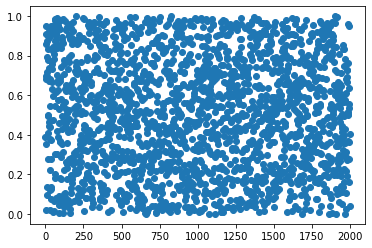

In [35]:
rn=[lcg() for i in range(2000)]
print (np.mean(rn))
print (np.std(rn),1/np.sqrt(12))
plt.plot(rn,"o")


Notice that they are uniformly distribuited. Recallfor the uniform distribution defined over the interval from $a$ to $b$, the variance equals
$
\sigma^2=\frac{(b-a)^2}{12}
$
And the standard deviation is the square root of the variance
$
\sigma=\frac{(b-a)}{\sqrt{12}}
$
In our case, $b=1$, $a=0 \Rightarrow \sigma=\frac{1}{\sqrt{12}}$

LCG though is not sufficiently "random" for several complex modern applications. There are nowadays better performing algorithms, like [Mersenne twister](https://en.wikipedia.org/wiki/Mersenne_Twister), a generalized feedback shift-register generator, is used, in particular the numpy random package features it.

Numpy uses as default [PCG-64](https://numpy.org/doc/stable/reference/random/bit_generators/index.html) of the [PCG family](https://www.pcg-random.org/), which are considered the ultimate random number generators.



## Python libraries for Random Number Generation 

There are two modules for (pseudo) random numbers that are commonly used. When all you need is to generate random numbers from some distribution, the `numpy.random` moodule is the simplest to use. When you need more information realted to a distribution such as quantiles or the PDF, you can use the `scipy.stats` module.

In [5]:
import numpy.random as npr
npr.seed(123) # fix seed for reproducible result

### Random data

In [6]:
# random values from a uniform distrubtion in [0.0, 1.0) for a given shape
print ("uniform:",'\n', npr.rand(3,4),'\n') # shape=(3,4)
 
# random values from a standard normal distrubtion  for a given shape
print ("normal:",'\n', npr.randn(2,5),'\n') # shape=(2,5)

# random integers between "low" and "high" edges for a given shape (size)
print ("integers:",'\n', npr.randint(1,50,size=(3,6)),'\n') # shape=(3,6)

uniform: 
 [[0.6965 0.2861 0.2269 0.5513]
 [0.7195 0.4231 0.9808 0.6848]
 [0.4809 0.3921 0.3432 0.729 ]] 

normal: 
 [[-0.6789 -0.0947  1.4914 -0.6389 -0.444 ]
 [-0.4344  2.2059  2.1868  1.0041  0.3862]] 

integers: 
 [[42 36 29 39 34 22]
 [31 28 35 34 13 41]
 [ 4 43  6  1 12 35]] 



### Operations on arrays

In [7]:
# randomly shuffling a vector
x = np.arange(10)
npr.shuffle(x)
print ("reshuffling:",'\n', x,'\n')
# npr.permutation works similarly

# Generates a random sample from a given 1-D array (without replacement)
x = np.arange(10,20)
print ("choice w/o replace",'\n',npr.choice(x, 10, replace=False),'\n')

# Generates a random sample of a given dimension from a given 1-D array
print ("choice w/ replace",'\n',npr.choice(x, (5, 10), replace=True),'\n') # this is default

reshuffling: 
 [1 5 0 8 7 9 3 4 2 6] 

choice w/o replace 
 [18 15 11 12 19 14 17 16 10 13] 

choice w/ replace 
 [[15 17 19 12 14 18 11 12 11 11]
 [13 15 19 10 18 11 16 13 13 15]
 [19 17 19 12 13 13 13 18 16 19]
 [17 16 13 19 16 16 16 11 13 14]
 [13 11 10 15 18 16 18 19 11 10]] 



## Probability Density Functions

numbers can be drawn from basically any common PDF (normal, binomial, chisquare, etc..)

exponential: 
 [[ 4.9009064339 17.9743648504]
 [ 1.8527050423 11.9551115867]
 [ 1.9455404786  3.5016915045]] 



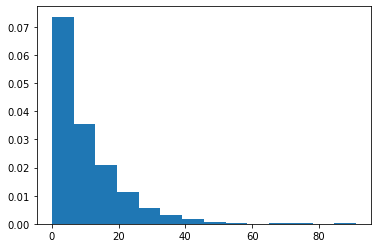

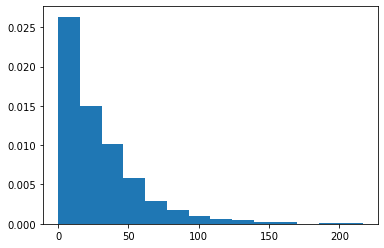

In [42]:
# exponential
print ("exponential:",'\n', npr.exponential(10, size=(3,2)),'\n')

exp = npr.exponential(10, size=1000)
count, bins, ignored = plt.hist(exp, 14, density = True)
plt.show()

exp = npr.exponential(30, size=1000)
count, bins, ignored = plt.hist(exp, 14, density = True)
plt.show()

Its probability density function is
$
f\left(x, \frac{1}{\beta}\right) = \frac{1}{\beta}\cdot\exp{\left(-\frac{x}{\beta}\right)}
$
where $\beta$ is the scale factor. In the examples above, $\beta= 10, 30$. It is defined only for $x\geq0$.


In [45]:
# tossing a dice
roll = 1./6
x = npr.multinomial(20000, [roll]*6, size=2)
print ("frequencies of 6-faces dice tossing (two players):",'\n', x)

frequencies of 6-faces dice tossing (two players): 
 [[3274 3290 3340 3303 3437 3356]
 [3334 3203 3330 3298 3426 3409]]


The multinomial distribution is a multivariate generalization of the binomial distribution. Take an experiment with one of $p$ possible outcomes. An example of such an experiment is throwing a dice, where the outcome can be 1 through 6. Each sample drawn from the distribution represents $n$ such experiments. Its values, $X_i = [X_0, X_1, ..., X_p]$, represent the number of times the outcome was i.

Let's pretend we haven't seen any of the above functionalties available in numpy and scipy and walk through the basics.. But remember that all the following techniques are already implemented in python (numpy/scipy).

# Non-uniform random numbers

In several cases the actual random process occur with non-uniform probability, i.e. **with a given probability density function (pdf), different from the uniform distribution**. Several methods are available, we will see a few of them

### Inverse transform method

Let'start from a uniform distribution $u(z)$:

$$
\left\{
\begin{array}{ll}
      1 & 0\leq z\leq 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

and let's look for a function $x(z)$ such that $x$ is distributed accordingly to a given pdf $p(x)$. We want $x(z)$ to be a function of $z$, that is a number generated by the uniform distribution. The probability to find $x$ between $x$ and $x+dx$ is equal to:

$$
p(x)dx = dz
$$

where $dz$ is the probability to find a unifor distribuited number between $0$ and $0+dz$. The above relation is imposed. Thus:

$$
\int_{-\infty}^{x(z)} p(x') dx' = \int_0^z dz'= z
$$

If (a) we could solve the integral (find the cdf) and (b) solve for $x$, then we are done. For most of the pdf at least one of the two is not possible.. The typical solvable analitical example is the **exponential distribution**:

$$
p(x) = \mu e^{-\mu x}
$$

$$
\int_{0}^{x(z)} p(x') dx' = 1 - e^{-\mu x} = z
$$

and thus:

$$
x(z) = - \frac{1}{\mu}\log{(1-z)}
$$

In [10]:
def expon_pdf(x, mu=1):
    """PDF of exponential distribution."""
    return mu*np.exp(-mu*x)

def expon_cdf(x, mu=1):
    """CDF of exponetial distribution."""
    return 1 - np.exp(-mu*x)

def expon_icdf(z, mu=1):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-z)/mu

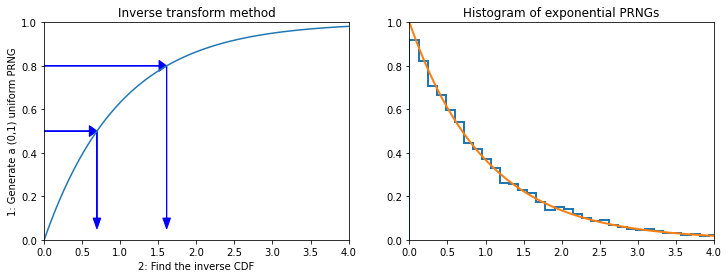

In [11]:
dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, expon_cdf(x))
plt.axis([0, 4, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
    plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
plt.ylabel('1: Generate a (0,1) uniform PRNG')
plt.xlabel('2: Find the inverse CDF')
plt.title('Inverse transform method');

plt.subplot(122)
u = np.random.random(10000)
v = expon_icdf(u)
plt.hist(v, histtype='step', bins=100, density=True, linewidth=2)
plt.plot(x, expon_pdf(x), linewidth=2)
plt.axis([0,4,0,1])
plt.title('Histogram of exponential PRNGs');

### Box-Muller for generating normally distributed random numbers

The inverse method is not applicable even for the gaussian distribution:

$$
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^{x} \exp{-\frac{x'^2}{2\sigma^2}} dx' = z
$$

is not solvable. We can not find analitically the gaussian cdf. The trick is to consider a two dimensional gaussian function with the same $\sigma$ on both coordinates:

$$
p(x)dx \times p(y)dy = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{-\frac{x^2}{2\sigma^2}} \times \frac{1}{\sqrt{2\pi\sigma^2}} \exp{-\frac{y^2}{2\sigma^2}} = \frac{1}{2\pi\sigma^2} \exp{-\frac{(x^2+y^2)}{2\sigma^2}}dxdy
$$

which written in radial coordinates:

$$
x=r\cos{\theta};\,\,\,
y=r\sin{\theta}
$$

$$
p(r,\theta)dr d\theta = \frac{r}{\sigma^2} \exp{-\frac{r^2}{2\sigma^2}} dr \times \frac{d\theta}{2\pi} = p(r)dr \times p(\theta)d\theta
$$

with both $p(r)$ and $p(\theta)$ normalized to 1. Now, the latter is a simple uniform distribution, whereas the former is solvable:

$$
\frac{1}{\sigma^2} \int_{0}^{r} \exp{-\frac{r^2}{2\sigma^2}} rdr = z
$$

which gives:

$$
r=\sqrt{-2\sigma^2\log{1-z}}
$$


In [51]:
n = 10000
z = np.random.random(n)
theta = 2*np.pi*np.random.random(n) # theta is uniformly distribuited between 0 and 2pi
r_squared = -2*np.log(1-z)
r = np.sqrt(r_squared)
data = pd.DataFrame({'x':r*np.cos(theta), 'y':r*np.sin(theta)}) # change of coordinates

Recall both $x$ an $y$ follow a gaussian distribution

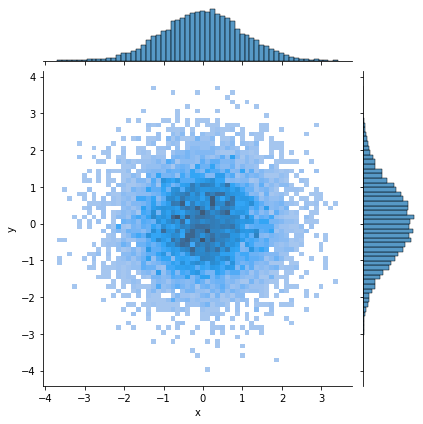

In [13]:
sns.jointplot(data=data, x='x',y='y', kind="hist")

### Creating a random number generator for arbitrary distributions

Suppose we have some random samples with an unknown distribution (e.g. data with a distribution that does not nicely fit into a common pdf). We can still use the **inverse transform method** to create a random number generator from a random sample, by estimating the inverse CDF function using **interpolation**.

In [59]:
from scipy.interpolate import interp1d

# define a function to use for estimating the icdf, starting from an interpolated cdf
def extrap1d(interpolator):
    """From StackOverflow http://bit.ly/1BjyRfk"""
    xs = interpolator.x
    ys = interpolator.y

    def pointwise(x):
        if x < xs[0]:
            return ys[0]+(x-xs[0])*(ys[1]-ys[0])/(xs[1]-xs[0])
        elif x > xs[-1]:
            return ys[-1]+(x-xs[-1])*(ys[-1]-ys[-2])/(xs[-1]-xs[-2])
        else:
            return interpolator(x)

    def ufunclike(xs):
        return np.array(list(map(pointwise, np.array(xs))))

    return ufunclike

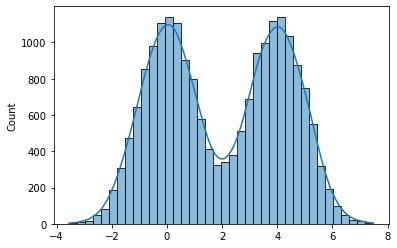

P(x<0): 0.249
P(x<2): 0.501
P(x<4): 0.748


In [70]:
from statsmodels.distributions.empirical_distribution import ECDF

# Make up some random data
x = np.concatenate([np.random.normal(0, 1, 10000),
                    np.random.normal(4, 1, 10000)])

# Plot the histogram
sns.histplot(x, kde=True)
plt.show()

ecdf = ECDF(x) 
# Returns the Empirical CDF of an array as a step function.
# ECDF fits an empirical cumulative distribution function and calculates the cumulative probabilities for specific observations from the domain.

# get cumulative probability for values
print('P(x<0): %.3f' % ecdf(0))
print('P(x<2): %.3f' % ecdf(2))
print('P(x<4): %.3f' % ecdf(4))

The class also provides an ordered list of unique observations in the data (the .x attribute) and their associated (cumulative) probabilities (.y attribute). We can access these attributes and plot the CDF function directly.

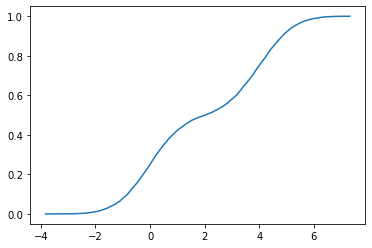

In [63]:
# plot the cdf
plt.plot(ecdf.x, ecdf.y)
plt.show()

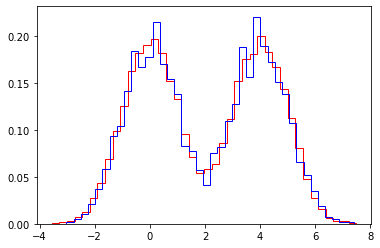

In [73]:
inv_cdf = extrap1d(interp1d(ecdf.y, ecdf.x,
                            bounds_error=False, assume_sorted=True)) # ecdf.x is sorted
r = np.random.uniform(0, 1, 5000)
ys = inv_cdf(r)

plt.hist(x, 40, histtype='step', color='red', density=True, linewidth=1) # true values
plt.hist(ys, 40, histtype='step', color='blue', density=True, linewidth=1); # estimated distribution

Another example here [How to Use an Empirical Distribution Function in Python](https://machinelearningmastery.com/empirical-distribution-function-in-python/).

### Rejection sampling (Accept-reject method)
Still creating a random number generator for arbitrary distributions.

Suppose **we want to sample from a (truncated) Cauchy distribution** (a Student-t distribution with 1 degree of freedom) or from any other distribution.
We use the uniform as a proposal distibution (highly inefficient).

It works for reasonable 1D distributions. For higher dimensional distribution or narrow peaks, this method is not at all efficient. 

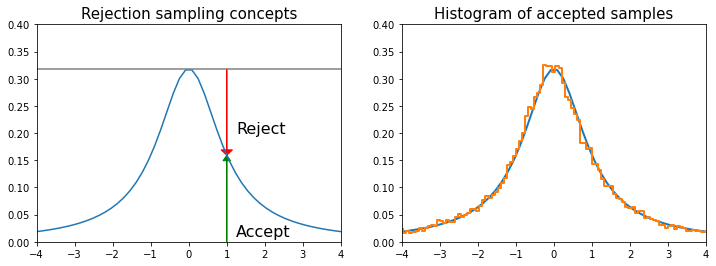

In [74]:
x = np.linspace(-4, 4) # truncated Cauchy distribution (x between -4 and 4)

dist = stats.cauchy()
upper = dist.pdf(0) # the cauchy distribution has its maximum in 0

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, dist.pdf(x)) 
plt.axhline(upper, color='grey')
px = 1.0
plt.arrow(px,0,0,dist.pdf(1.0)-0.01, linewidth=1,
         head_width=0.2, head_length=0.01, fc='g', ec='g')
plt.arrow(px,upper,0,-(upper-dist.pdf(px)-0.01), linewidth=1,
         head_width=0.3, head_length=0.01, fc='r', ec='r')
plt.text(px+.25, 0.2, 'Reject', fontsize=16)
plt.text(px+.25, 0.01, 'Accept', fontsize=16)
plt.axis([-4,4,0,0.4])
plt.title('Rejection sampling concepts', fontsize=15)

plt.subplot(122)
n = 100000
# generate from sampling distribution
u = np.random.uniform(-4, 4, n)
# accept-reject criterion for each point in sampling distribution
r = np.random.uniform(0, upper, n)
# accepted points will come from target (Cauchy) distribution
v = u[r < dist.pdf(u)]

plt.plot(x, dist.pdf(x), linewidth=2)

# Plot scaled histogram
factor = dist.cdf(4) - dist.cdf(-4)
hist, bin_edges = np.histogram(v, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.step(bin_centers, factor*hist, linewidth=2)

plt.axis([-4,4,0,0.4])
plt.title('Histogram of accepted samples', fontsize=15);


### Mixture representations
Sometimes, the target distribution  which we need to generate random numbers from can be expressed as a mixture of “simpler” distributions that we already know how to sample from

$$
f(x)=\int g(x|y)p(y)dy
$$

For example, if $y$ is drawn from the $\chi^2_\nu$ distrbution, then the normal distribution ${\cal N}(0,\nu/y)$ is a sample from the Student-t distribution with $\nu$ degrees fo freedom.

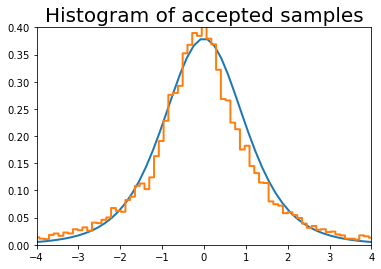

In [81]:
n = 10000
df = 5
dist = stats.t(df=df)
y = stats.chi2(df=df).rvs(size=n)
r = stats.norm(0, df/y).rvs(n)


plt.plot(x, dist.pdf(x), linewidth=2)

# Plot scaled histogram
factor = dist.cdf(4) - dist.cdf(-4)
hist, bin_edges = np.histogram(r, bins=1000, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.step(bin_centers, factor*hist, linewidth=2)

plt.axis([-4,4,0,0.4])
plt.title('Histogram of accepted samples', fontsize=20);

### Draw from an analytic pdf

>Obviously scipy stats module features all possible pdf that can come to your mind. You can draw random data from each of them

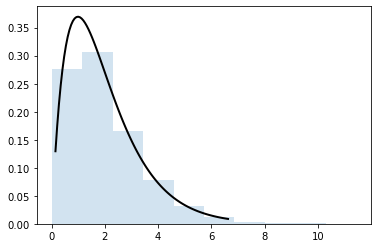

In [82]:
from scipy.stats import gamma # A gamma continuous random variable (it has only one parameter a).
a = 1.99

# take the interesting range
x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100) # ppf: percent point function (inverse of cdf)
# plot the distribution
rv = gamma(a)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x), 'k-', lw=2)
r = gamma.rvs(a, size=10000) # rvs: random variates
_ = ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)


The random variates follow the pdf. <br>
_"rvs"_ allows to draw random data from the distribution.

# Monte Carlo integration

> Monte Carlo integration is typically less accurate than other integration methods, but very often is the only available tool, e.g. when the integrand has very rapid variations or singular points, or, most importantly, when dealing with high dimensional integrals.

The idea is simple, let's the area under the function be $I$ whereas the all possible outcomes lay in a box of area $A$. The probability for a point to fall under the function is $p=I/A$. If we generate $N$ random points, the fraction $k$ which fall under the curve is $k/N$ and approximate $I/A$, thus:

$$
I\simeq\frac{k A}{N}
$$

Let's try this with the function $f(x) =\sin^2{\frac{1}{x(2-x)}}$

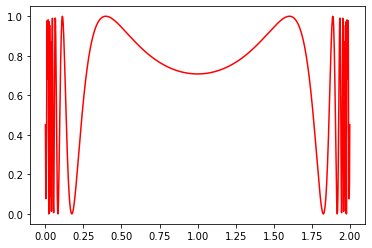

In [23]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'r-')

In [83]:
# Monte Carlo integration
N=100000
count=0
for i in range(N):
    # at each step create a random point (x, y) in the region
    x=2*np.random.random()
    y=np.random.random()
    
    # check if y falls under the curve 
    if y<f(x): count+=1
    
A = 2
I=A*count/N 
print(I)

1.44818


### The mean value method

Let's take the integral:

$$
I=\int_a^b f(x) dx
$$

defining $\langle f \rangle$ as the mean of $f$:

$$
\langle f \rangle = \frac{1}{b-a}\int_a^b f(x) dx
$$

and estimating $\langle f \rangle$ by uniformely probing at random the function domain, such as

$$
\langle f \rangle = \frac{1}{N} \sum_{i=1}^{N} f(x_i)
$$

we get:

$$
I=\frac{b-a}{N} \sum_{i=1}^{N} f(x_i)
$$

this easily generalize to higher dimensions:

$$
I=\frac{V}{N} \sum_{i=1}^{N} f(\vec{r}_i)
$$

where the sampling points $\vec{r}_i$ are drawn uniformly at random from integration space of volume $V$.

It can be proven that the standard deviation of the method (so the error) scales $1/\sqrt{N}$:

$$
\sigma = V\frac{\sqrt{{\rm var}\, f}}{\sqrt{N}}
$$

### Importance sampling

There are several general techniques for variance reduction, sometimes known as Monte Carlo swindles ("truffe") since these methods improve the accuracy and convergence rate of Monte Carlo integration without increasing the number of Monte Carlo samples. *Importance sampling* is among the most commonly used.

We can define a weighted average of a function $g(x)$:

$$
\langle g_w \rangle = \frac{\int_a^b w(x) g(x)dx}{\int_a^b w(x)dx}
$$

Consider again the integral of $f(x)$:

$$
I=\int_a^b f(x)dx
$$

Setting $g(x)=f(x)/w(x)$ we have:

$$
\left\langle \frac{f(x)}{w(x)}\right\rangle = \frac{\int_a^b w(x)f(x)/w(x) )dx}{\int_a^b w(x)dx} = \frac{I}{\int_a^b w(x)dx}
$$

and thus:

$$
I = \left\langle \frac{f(x)}{w(x)}\right\rangle \int_a^b w(x)dx \simeq \frac{1}{N}\sum_{i=1}^N \frac{f(x_i)}{w(x_i)}\int_a^b w(x)dx
$$

which generalizes the mean value method if $w(x)$ is the uniform distribution between $a$ and $b$, meaning that $w(x)=1$ if $a\leq x\leq b$.

Moreover, the points $x_i$ can be drawn according to the distribution $w(x)$ or any other distribution, inside the interval $[a, b]$. See example below.

### Example

Suppose we want to estimate the tail probability of ${\cal N}(0,1)$ for $P(x>5)$. Regular MC integration using samples from ${\cal N}(0,1)$ is hopeless since nearly all samples will be rejected. However, we can use the exponential density truncated at 5 as the importance function and use importance sampling.

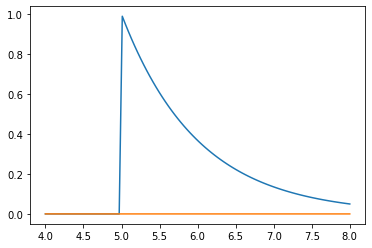

In [87]:
x = np.linspace(4, 8, 100)
plt.plot(x, stats.expon(5).pdf(x))
plt.plot(x, stats.norm().pdf(x))
# plt.yscale('log')

In [31]:
%precision 10
h_true =1 - stats.norm().cdf(5)
h_true

2.866515719235352e-07

In [32]:
# STANDARD MC METHOD

n = 1000000
y = stats.norm().rvs(n) # random variates according to the normal distribution
print ("integral (sum) above 5:", np.sum(y > 5))
h_mc = 1.0/n * np.sum(y > 5) # the total area is 1
# estimate and relative error
print ("estimate:", h_mc)
print ("relative error:", np.abs(h_mc - h_true)/h_true)

integral (sum) above 5: 0
estimate: 0.0
relative error: 1.0


In [33]:
# IMPORTANCE SAMPLING

n = 10000
y = stats.expon(loc=5).rvs(n) # select the points according to the exponential distribution (smart choice)
h_is = 1.0/n * np.sum(stats.norm().pdf(y)/stats.expon(loc=5).pdf(y))
# estimate and relative error
print ("estimate:", h_is)
print ("relative error:", np.abs(h_is - h_true)/h_true)

estimate: 2.8792667521301896e-07
relative error: 0.004448268959166598
